In [ ]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/lists.tar
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/README.txt
# !cat README.txt
!tar -xf images.tar
!tar -xf annotation.tar
!tar -xf lists.tar

In [ ]:
import os, cv2
import numpy as np
import tensorflow as tf
from tensorflow.python import keras

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, AvgPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from keras import layers
from keras import models

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from PIL import Image

In [ ]:
#-------Import Dependencies-------#
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fpath = "./Images"
random_seed = 42
num_classes = 60
categories = os.listdir(fpath)
categories = categories[:num_classes]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories)) 

List of categories =  ['n02098286-West_Highland_white_terrier', 'n02106382-Bouvier_des_Flandres', 'n02097298-Scotch_terrier', 'n02096294-Australian_terrier', 'n02088364-beagle', 'n02091032-Italian_greyhound', 'n02112350-keeshond', 'n02088466-bloodhound', 'n02113186-Cardigan', 'n02100583-vizsla', 'n02108089-boxer', 'n02101388-Brittany_spaniel', 'n02098105-soft-coated_wheaten_terrier', 'n02110958-pug', 'n02110627-affenpinscher', 'n02094433-Yorkshire_terrier', 'n02087046-toy_terrier', 'n02111129-Leonberg', 'n02096585-Boston_bull', 'n02094114-Norfolk_terrier', 'n02097130-giant_schnauzer', 'n02105505-komondor', 'n02110806-basenji', 'n02085782-Japanese_spaniel', 'n02108422-bull_mastiff', 'n02094258-Norwich_terrier', 'n02089867-Walker_hound', 'n02110185-Siberian_husky', 'n02093647-Bedlington_terrier', 'n02111500-Great_Pyrenees', 'n02116738-African_hunting_dog', 'n02097209-standard_schnauzer', 'n02085620-Chihuahua', 'n02099267-flat-coated_retriever', 'n02111277-Newfoundland', 'n02113624-toy_po

In [ ]:
annotations_dict = {}
path_ann = "Annotation"

for breed in os.listdir(path_ann):
    for ann in os.listdir(os.path.join(path_ann, breed)):
        ann_path = os.path.join(path_ann, breed, ann)
        ann_file = None
        with open(ann_path) as f:
            ann_file = f.readlines()
        interesting = ann_file[18:22]
        bbox_names = ['xmin', 'ymin', 'xmax', 'ymax']
        bbox_dict = {}
        for i, val in enumerate(interesting):
            val2 = int(val.split('<')[1][5:])
            bbox_dict[bbox_names[i]] = val2
        annotations_dict[ann] = bbox_dict

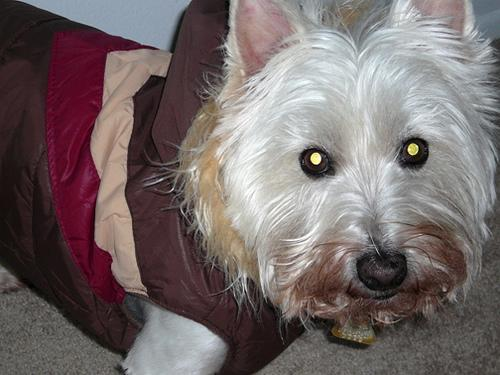

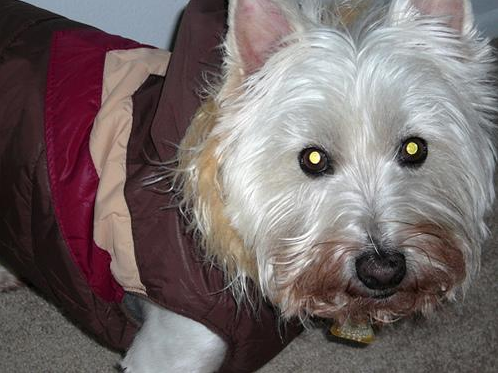

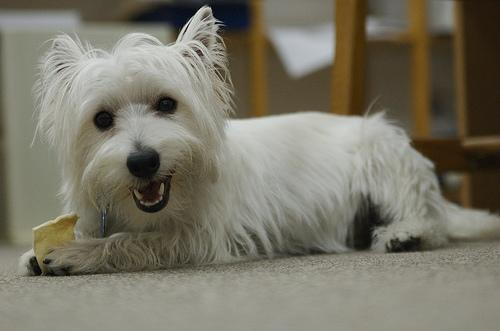

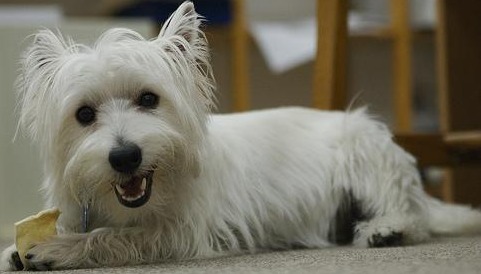

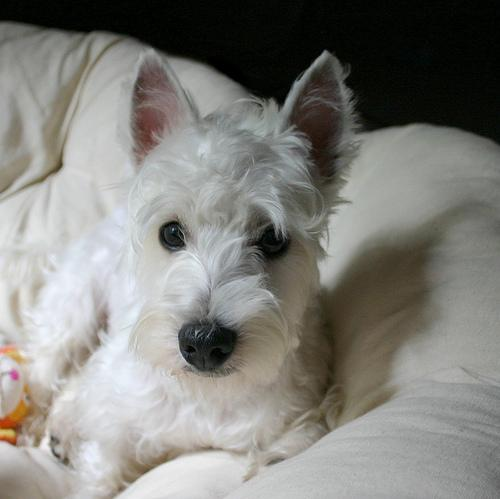

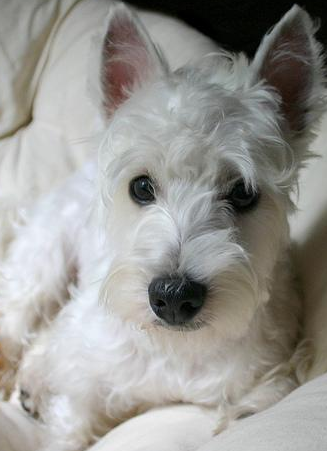

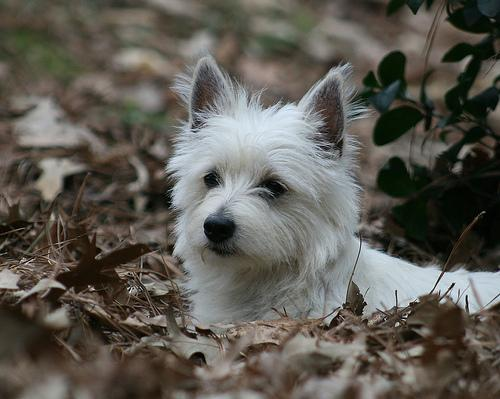

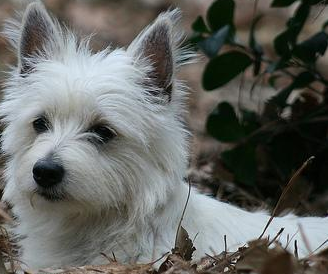

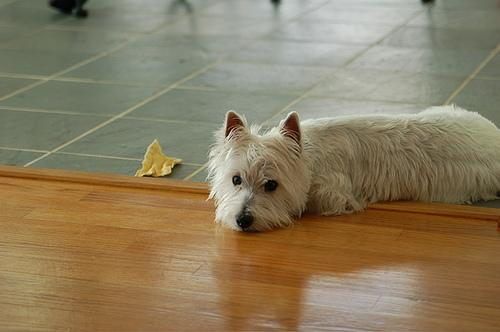

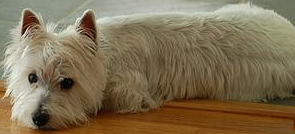

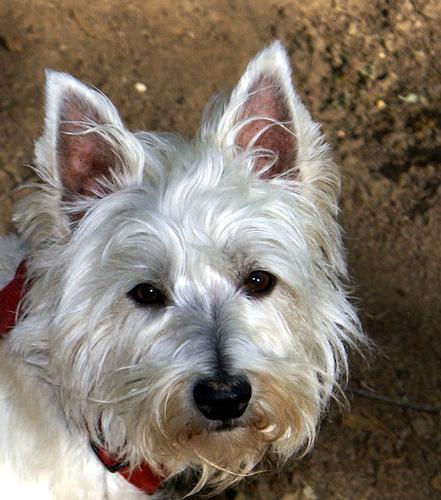

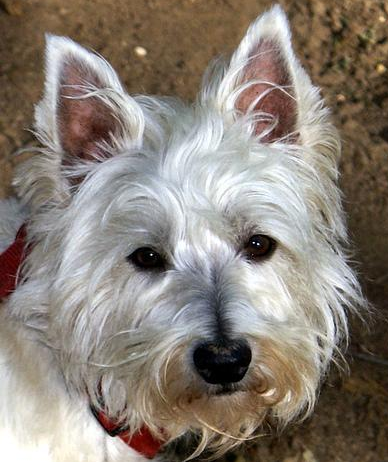

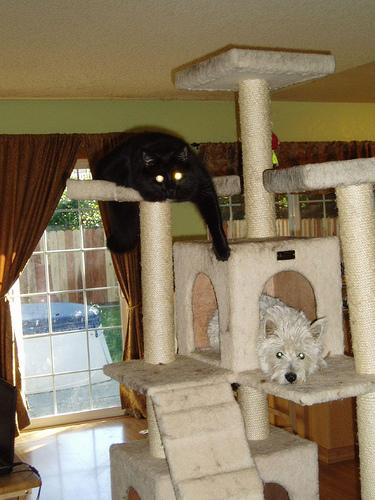

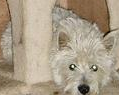

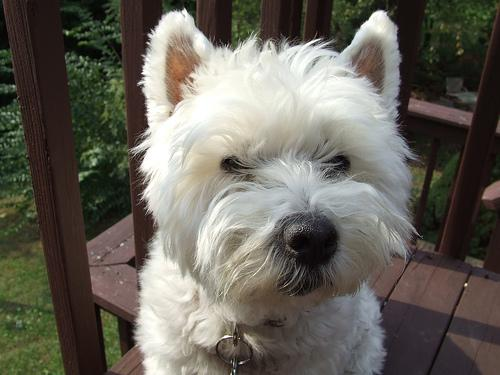

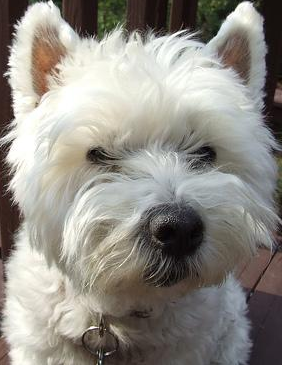

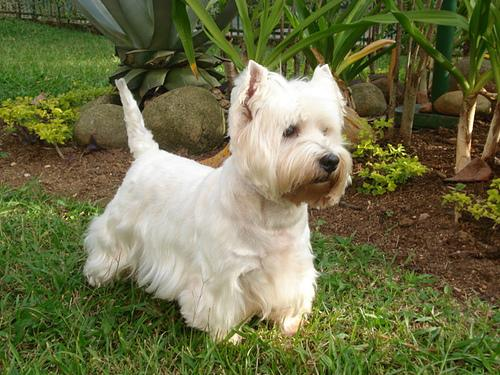

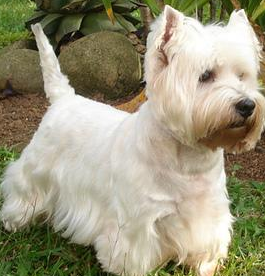

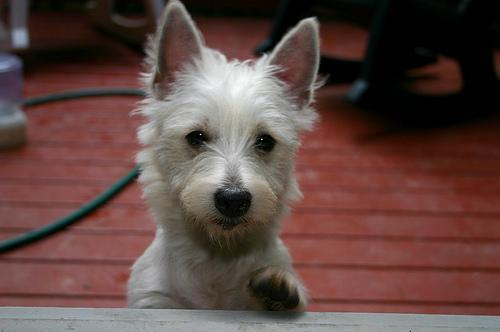

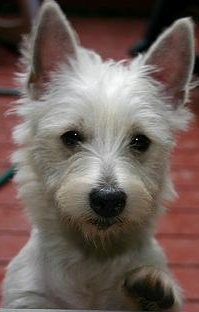

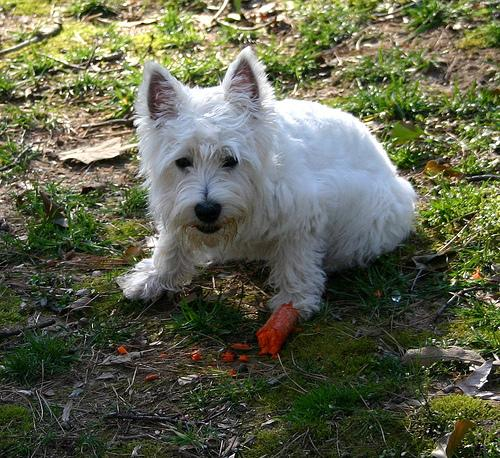

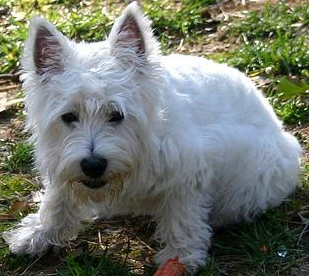

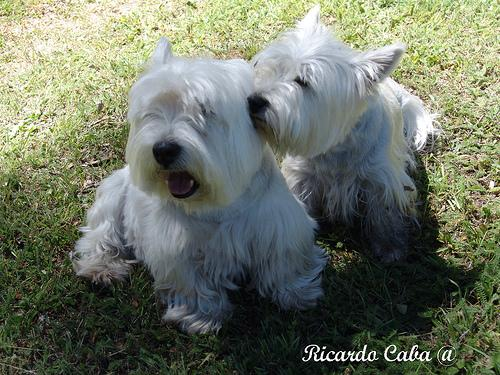

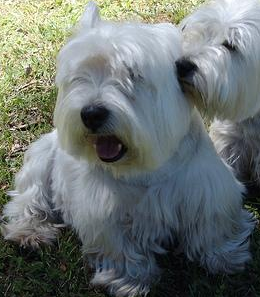

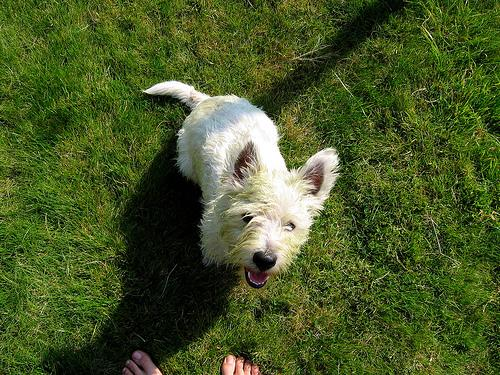

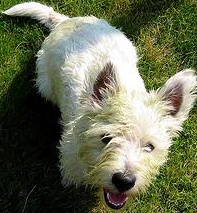

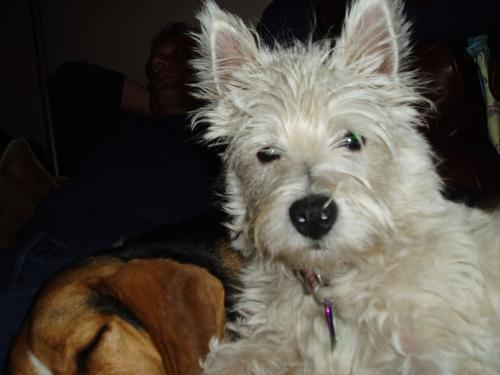

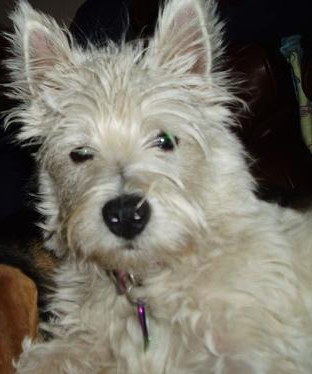

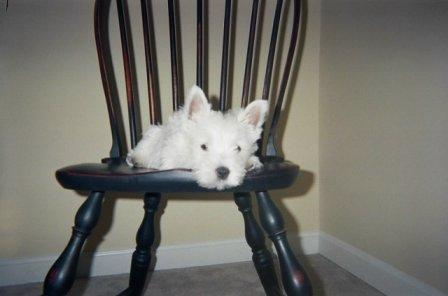

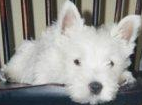

No. of images loaded =  10261 
No. of labels loaded =  10261
<class 'list'> <class 'list'>


In [ ]:
from google.colab.patches import cv2_imshow
def load_images_and_labels(categories):
    ctr = 0
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            ctr += 1
            bbox = annotations_dict[image_name[:-4]]
            if ctr <= 15:
              img = cv2.imread(fpath+"/"+category+"/"+image_name)
              cv2_imshow(img)
              img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
              img = img[bbox['ymin']:bbox['ymax'], bbox['xmin']:bbox['xmax']] 
              img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
              cv2_imshow(img)
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img[bbox['ymin']:bbox['ymax'], bbox['xmin']:bbox['xmax']]
            img_array = Image.fromarray(img, 'RGB')
            resized_img = img_array.resize((227, 227))
            img_lst.append(np.array(resized_img))
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

In [ ]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)

print(type(images),type(labels))

Images shape =  (10261, 227, 227, 3) 
Labels shape =  (10261,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (8208, 227, 227, 3)
y_train shape =  (8208,)

x_test shape =  (2053, 227, 227, 3)
y_test shape =  (2053,)


In [ ]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=50,  
        zoom_range = 0.2, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

58900480/58889256 [==============================] - 0s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f154eed2410> False
<keras.layers.convolutional.Conv2D object at 0x7f14bc8b1750> False
<keras.layers.convolutional.Conv2D object at 0x7f14bc9758d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f14bc8d0990> False
<keras.layers.convolutional.Conv2D object at 0x7f14b0533a10> False
<keras.layers.convolutional.Conv2D object at 0x7f14b0535a10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f14b0541210> False
<keras.layers.convolutional.Conv2D object at 0x7f14b053b910> False
<keras.layers.convolutional.Conv2D object at 0x7f14b0544b10> False
<keras.layers.convolutional.Conv2D object at 0x7f14b054c110> False
<keras.layers.pooling.MaxPooling2D object at 0x7f14b04d2c10> False
<keras.layers.convolutional.Conv2D object at 0x7f14b0549150> False
<keras.layers.convolutional.Conv2D object at 0x7f14b04db650> False
<keras.layers.convolutional.Conv2D object at 0x7f14b04e18d0> F

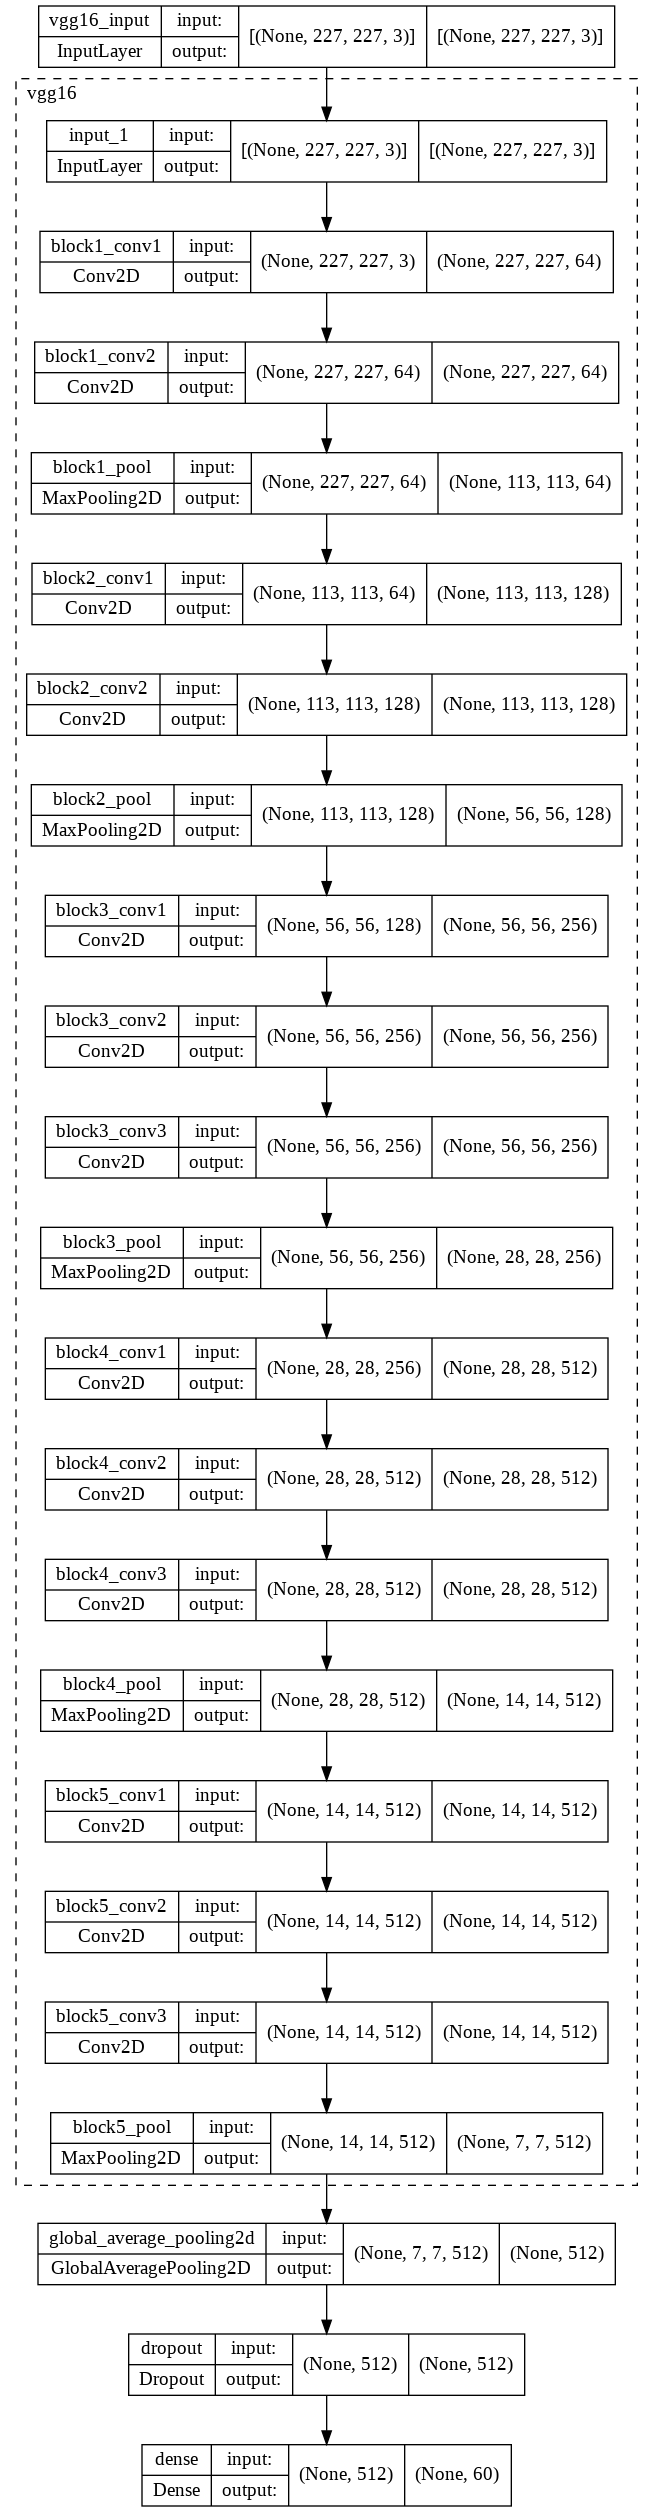

In [ ]:
base_model = VGG16(include_top=False,
                  input_shape = (227,227,3),
                  weights = 'imagenet')



for layer in base_model.layers[:17]:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=2e-5)
checkpoint = ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

learning_rate= 2e-5
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size = 1, epochs=30, validation_data=(x_test,y_test), callbacks=[lr_reduce,checkpoint])

Epoch 1/30
8208/8208 [==============================] - ETA: 0s - loss: 5.7089 - accuracy: 0.0993
Epoch 1: val_accuracy improved from -inf to 0.34778, saving model to vgg16_finetune.h15
INFO:tensorflow:Assets written to: vgg16_finetune.h15/assets
8208/8208 [==============================] - 135s 15ms/step - loss: 5.7089 - accuracy: 0.0993 - val_loss: 2.6715 - val_accuracy: 0.3478 - lr: 2.0000e-05
Epoch 2/30
8204/8208 [============================>.] - ETA: 0s - loss: 2.5994 - accuracy: 0.3296
Epoch 2: val_accuracy improved from 0.34778 to 0.54213, saving model to vgg16_finetune.h15
INFO:tensorflow:Assets written to: vgg16_finetune.h15/assets
8208/8208 [==============================] - 126s 15ms/step - loss: 2.5990 - accuracy: 0.3297 - val_loss: 1.7584 - val_accuracy: 0.5421 - lr: 2.0000e-05
Epoch 3/30
8204/8208 [============================>.] - ETA: 0s - loss: 1.7861 - accuracy: 0.5093
Epoch 3: val_accuracy improved from 0.54213 to 0.60643, saving model to vgg16_finetune.h15
INFO:ten

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("Accuracy", acc)

65/65 [==============================] - 15s 188ms/step - loss: 1.1470 - accuracy: 0.7506
Accuracy 0.7506088614463806


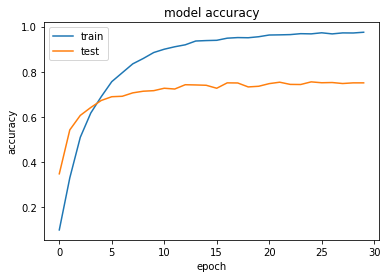

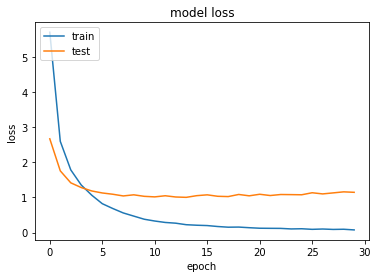

In [ ]:
# plot model performance
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

plt.figure()
plt.gcf().clear()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AGH/dog_breeds_before_tuning.h5')